### Условие 1: Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

#### 1.1. Скачать данные по ссылке kc_house_data

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
df = pd.read_csv('kc_house_data.csv')
df.drop(columns=['date', 'zipcode', 'lat', 'long'], inplace=True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


#### 1.2 Изучите стоимости недвижимости

In [14]:
df['price'].describe().round(2)

count      21613.00
mean      540088.14
std       367127.20
min        75000.00
25%       321950.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: float64

#### 1.3 Изучите распределение квадратуры жилой

In [15]:
df['sqft_living'].describe().round(0)

count    21613.0
mean      2080.0
std        918.0
min        290.0
25%       1427.0
50%       1910.0
75%       2550.0
max      13540.0
Name: sqft_living, dtype: float64

Text(0, 0.5, 'Кол-во объектов')

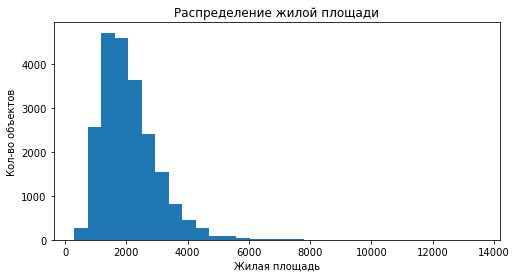

In [16]:
plt.figure(figsize=(8, 4))

plt.hist(df['sqft_living'], bins=30)

plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Кол-во объектов')

1.4 Изучите распределение года постройки

In [17]:
df['yr_built'].describe().round(0)

count    21613.0
mean      1971.0
std         29.0
min       1900.0
25%       1951.0
50%       1975.0
75%       1997.0
max       2015.0
Name: yr_built, dtype: float64

Text(0, 0.5, 'Кол-во объектов')

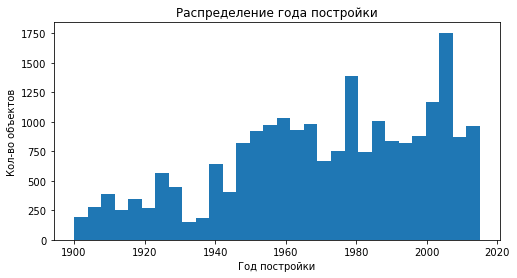

In [18]:
plt.figure(figsize=(8, 4))

plt.hist(df['yr_built'], bins=30)

plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во объектов')

### Условие 2: 2 задача

#### 2.1 Изучите распределение домов от наличия вида на набережную

In [25]:
df['view'].describe().round(0)

count    21613.0
mean         0.0
std          1.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          4.0
Name: view, dtype: float64

In [ ]:
view = df["view"].value_counts()
view

Text(0.5, 1.0, 'Типы памяти')

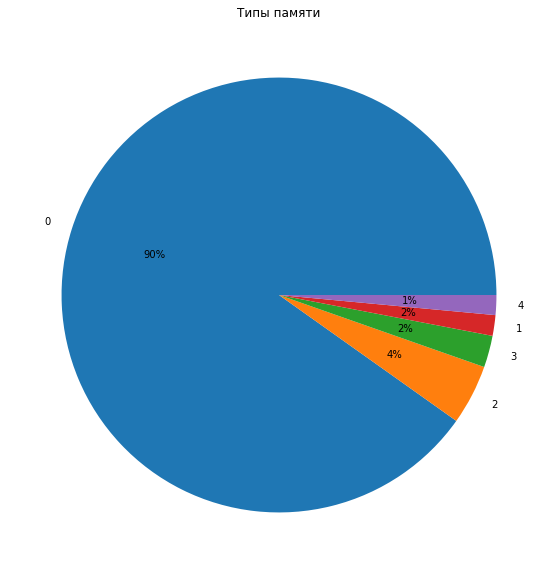

In [24]:
plt.figure(figsize=(10, 10))
plt.pie(view.values,autopct='%1.lf%%', labels = view.index)
plt.title('Вид на набережную')

Text(0, 0.5, 'Кол-во')

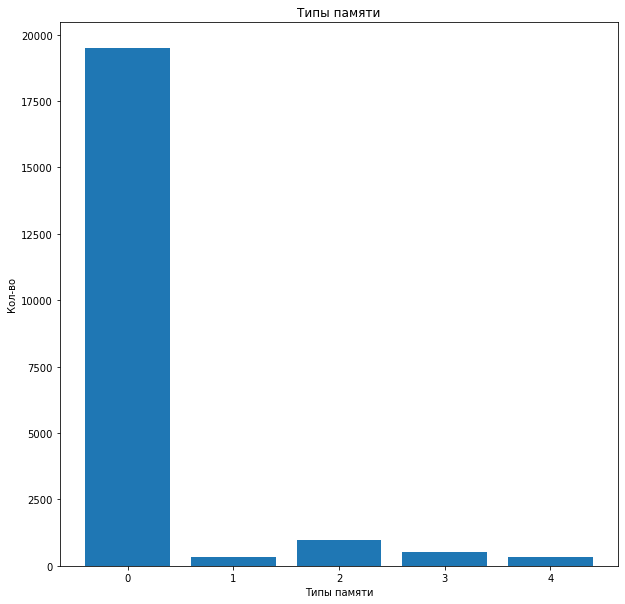

In [31]:
plt.figure(figsize = (10,10))
plt.bar(view.index, view.values)
plt.title("Вид на набережную")
plt.xlabel("Оценка вида")
plt.ylabel("Кол-во объектов")

#### 2.2 Изучите распределение этажей домов

In [35]:
df['floors'].describe()

count    21613.000000
mean         1.494309
std          0.539989
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [37]:
floors = df["floors"].value_counts()
floors

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

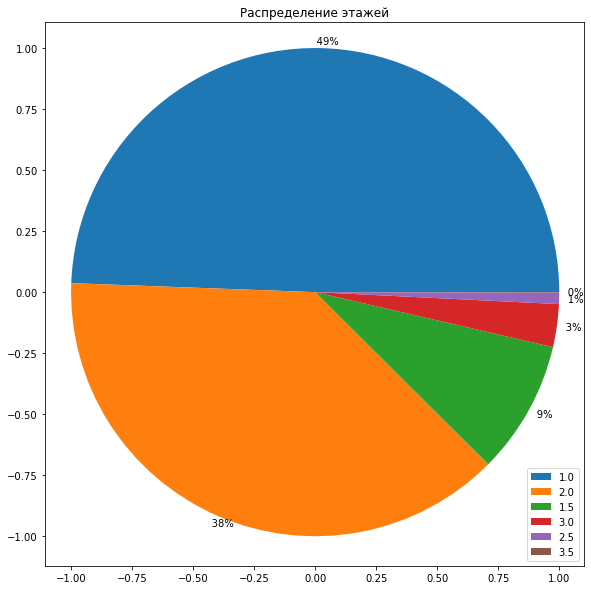

In [56]:
plt.figure(figsize=(10, 10))
plt.pie(floors.values,autopct='%7.lf%%',frame=True,pctdistance = 1.03)
plt.title('Распределение этажей')
plt.legend(floors.index);

Text(0, 0.5, 'Кол-во объектов')

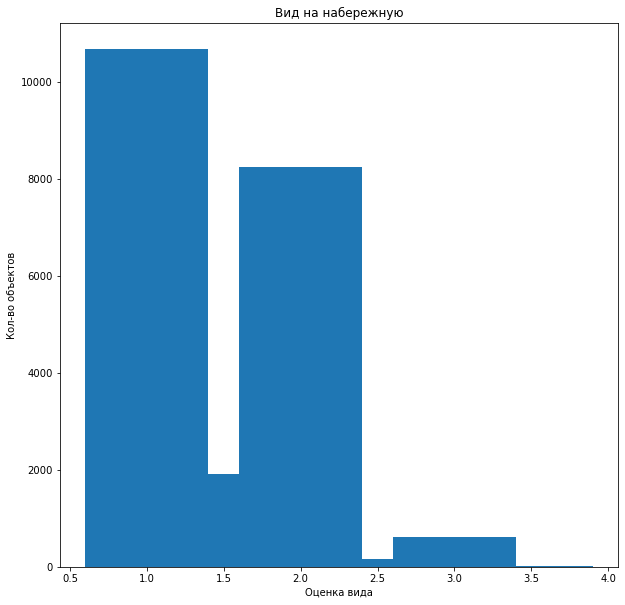

In [57]:
plt.figure(figsize = (10,10))
plt.bar(floors.index, floors.values)
plt.title("Вид на набережную")
plt.xlabel("Оценка вида")
plt.ylabel("Кол-во объектов")

#### 2.2 Изучите распределение состояния домов

In [61]:
df['condition'].describe().round(2)

count    21613.00
mean         3.41
std          0.65
min          1.00
25%          3.00
50%          3.00
75%          4.00
max          5.00
Name: condition, dtype: float64

In [62]:
condition = df["condition"].value_counts()
condition

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

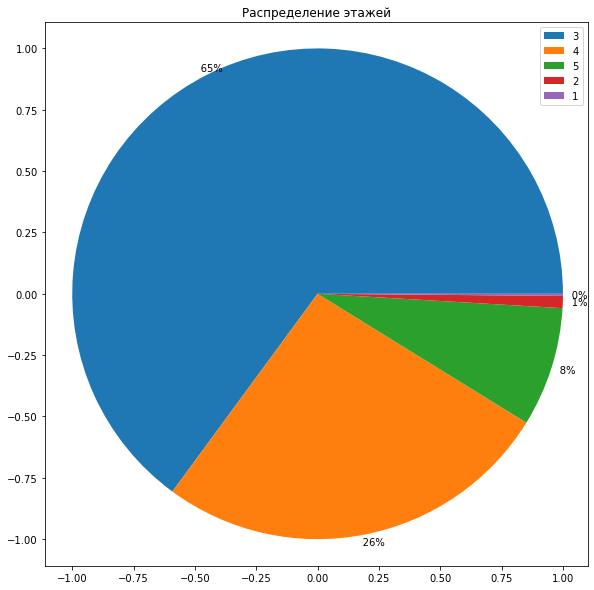

In [63]:
plt.figure(figsize=(10, 10))
plt.pie(condition.values,autopct='%7.lf%%',frame=True,pctdistance = 1.03)
plt.title('Распределение этажей')
plt.legend(condition.index);

Text(0, 0.5, 'Кол-во объектов')

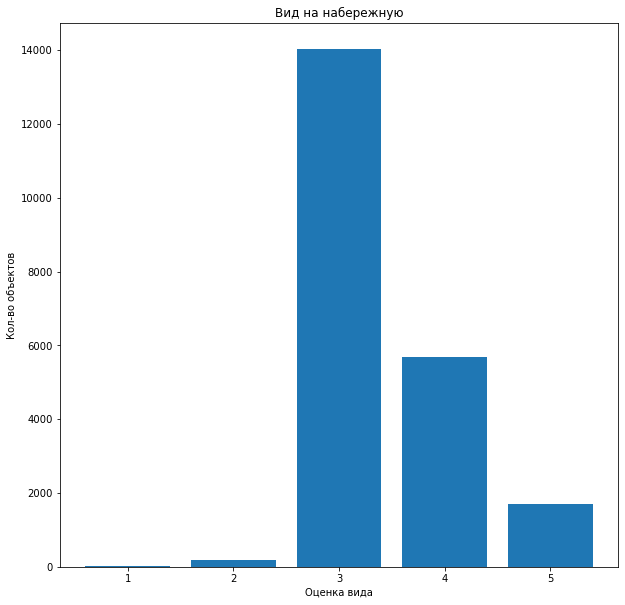

In [66]:
plt.figure(figsize = (10,10))
plt.bar(condition.index, condition.values)
plt.title("Вид на набережную")
plt.xlabel("Оценка вида")
plt.ylabel("Кол-во объектов")

In [67]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


### Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [85]:
# Готовим данные для графика в виде сводной таблицы
data = df.groupby('condition')['price'].agg(count='mean').reset_index().sort_values(by='condition')
data.head()

,condition,count
0,1,334431.666667
1,2,327287.145349
2,3,542012.578148
3,4,521200.390033
4,5,612418.089359


In [84]:
df['condition'].describe().round(0)

count    21613.0
mean         3.0
std          1.0
min          1.0
25%          3.0
50%          3.0
75%          4.0
max          5.0
Name: condition, dtype: float64

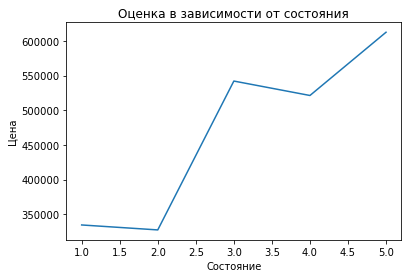

In [87]:
plt.figure(figsize=(6, 4))
plt.plot(data['condition'], data['count'])

plt.title('Стоимость в зависимости от состояния')
plt.xlabel('Состояние')
plt.ylabel('Цена');

In [94]:
# Готовим данные для графика в виде сводной таблицы
data = df.groupby('yr_built')['price'].agg(count='mean').reset_index().sort_values(by='yr_built')
data.head()

,yr_built,count
0,1900,581387.206897
1,1901,556935.931034
2,1902,673007.407407
3,1903,480958.195652
4,1904,583756.644444


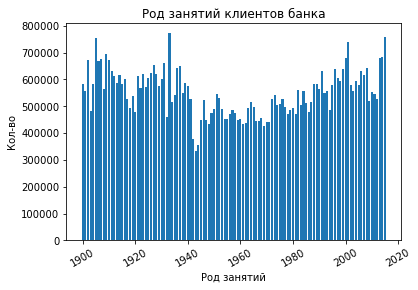

In [97]:
plt.figure(figsize=(6, 4))

plt.bar(data['yr_built'], data['count'])

plt.title('Стоимость от года постройки')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

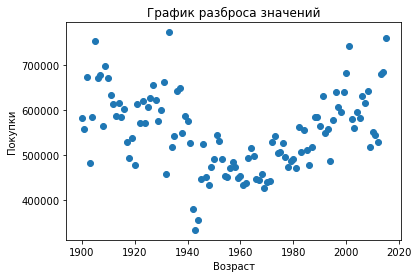

In [98]:
plt.figure(figsize=(6, 4))

plt.scatter(data['yr_built'], data['count'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

#### Возраст дома с учетом реновации

In [116]:
df['delta_renovated'] = (df['yr_renovated']-df['yr_built']).apply(lambda x: x if x > 0 else 0)+df['yr_built']
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,delta_renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,1991
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,1987


In [118]:
data = df.groupby('delta_renovated')['price'].agg(count='mean').reset_index().sort_values(by='delta_renovated')
data.head()

,delta_renovated,count
0,1900,575054.220588
1,1901,545933.642857
2,1902,648488.000000
3,1903,496036.925000
4,1904,586155.102564


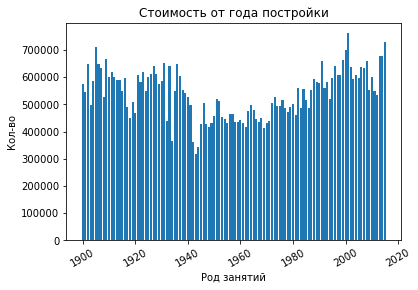

In [119]:
plt.figure(figsize=(6, 4))

plt.bar(data['delta_renovated'], data['count'])

plt.title('Стоимость от года постройки')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

In [120]:
import seaborn as sns

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

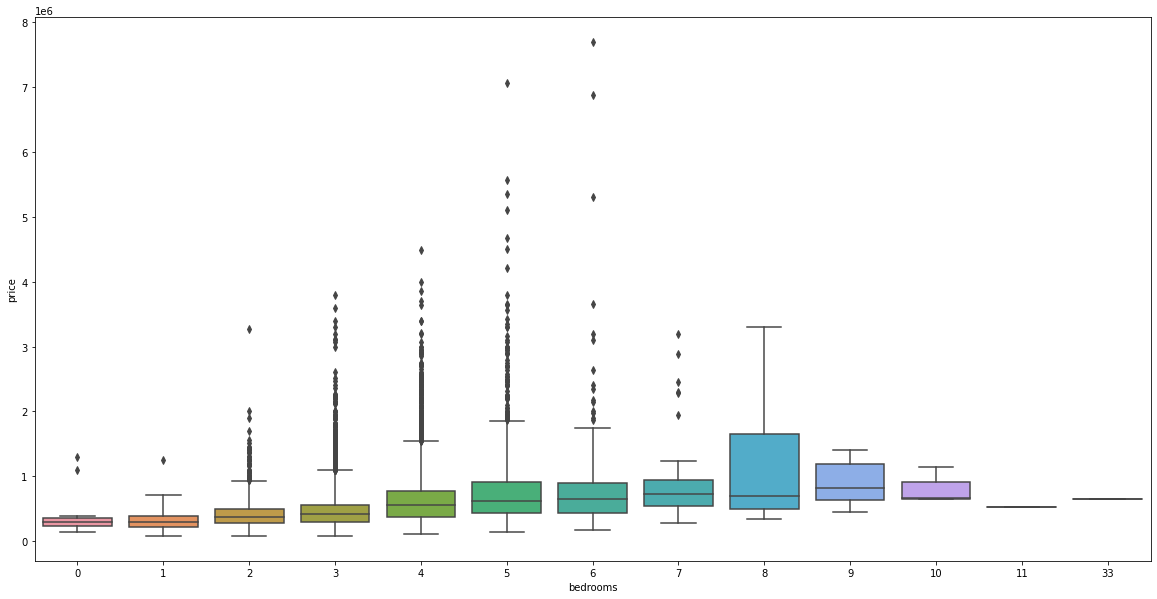

In [131]:
plt.figure(figsize =(20,10))
sns.boxplot(x=df['bedrooms'], y  = df['price'], whis = 2 )

In [ ]:
Многорядовые столбчатые диаграммы
# Готовим данные для графика
data = pd.crosstab(df['job'], df['convert']).reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()
convert	job	no	yes
1	blue-collar	9024	708
4	management	8157	1301
9	technician	6757	840
0	admin.	4540	631
7	services	3785	369
# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['no']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['no'], width=w)
plt.bar(n_ticks + offset, data['yes'], width=w)

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.legend(['no', 'yes'])
plt.xticks(n_ticks, data['job'], rotation = 30);  # добавляем метки делений

In [132]:
# Готовим данные для графика в виде сводной таблицы
data = df.groupby('grade')['price'].agg(count='mean').reset_index().sort_values(by='grade')
data.head()

,grade,count
0,1,142000.000000
1,3,205666.666667
2,4,214381.034483
3,5,248523.971074
4,6,301919.637390


In [140]:
# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(20, 10))
# определяем кол-во делений

n_ticks = np.arange(len(data['142000']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks + offset, data['142000'], width=w)
plt.bar(n_ticks -offset, data['205666'], width=w)

plt.title('Производители процессоров')
plt.xlabel('Производители ноутбуков')
plt.ylabel('Кол-во')
plt.legend(['AMD', 'Intel'])
plt.xticks(n_ticks, data['Company'], rotation = 30);  # добавляем метки делений

KeyError: '142000'

<Figure size 1440x720 with 0 Axes>